# 网格的矩阵表示与

* 基本数组
* 命名与定向约定
* 辅助数组的生成算法

## Poisson 方程模型

## Galerkin 方法

## 有限元方法

## 网格

网格类型
* 一维
* 二维
    + 三角形
    + 四边形
    + 多边形
* 三维
    + 四面体
    + 六面体
    + 多面体

用两个基本数组表示一个网格：

* node
* cell

给出三角形网格的实例，让学生写出其它类型网格的实例。

关键概念：
* 节点的单元局部编号
* 节点的全局编号
* 边的局部编号
* 边的定向
* 单元的定向

以一个简单的三角形网格为例讲解 edge 生成算法

1. 生成所有重复的边 

```
localEdge = np.array([(1, 2), (2, 0), (0, 1)])
totalEdge = cell[:, localEdge].reshape(-1, 2)
totalEdge = np.sort(totalEdge, axis=1)


totalEdge:

[[0 2]
 [0 1]
 [1 2]
 [0 2]
 [2 3]
 [0 3]]
```

2. 用字典排序生成唯一的边，不考虑边的定向问题 

```
edge, i0, j = unique_row(totalEdge) # 字典排序
edge:

[[0 1]
 [0 2]
 [0 3]
 [1 2]
 [2 3]]

i0: [1 0 5 2 4]
i1: [1 3 5 2 4]

j : [1 0 3 1 4 2]
cell2edge：[[1， 0, 3]
            [1, 4, 2]]


edge == totalEdge[i0, :]
totalEdge = edge[j, :]
```

3. 利用 `i0`， `i1` 生成 `edge2cell`

```
NE = i0.shape[0]
edge2cell = np.zeros((NE, 4), dtype=self.itype)
i1 = np.zeros(NE, dtype=self.itype) 
i1[j] = np.arange(E*NC, dtype=self.itype)
edge2cell[:, 0] = i0//3 
edge2cell[:, 1] = i1//3
edge2cell[:, 2] = i0%3 
edge2cell[:, 3] = i1%3 
```

4. 得到定向的边 

```
edge = cell[edge2cell[:, [0]], localEdge[edge2cell[:, 2]]]
```

5. 利用 edge2cell 生成 `cell2cell`

* 形状
* 每个元素代表的意义

以四边形为例， 生成上述数据结构

多边形的数组结构

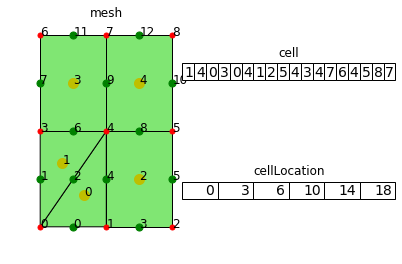

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
%matplotlib inline
from fealpy.mesh.PolygonMesh import PolygonMesh

def labels(n):
    r = [str(i)+':' for i in range(n)]
    return r

node = np.array([
    [0, 0],
    [1, 0],
    [2, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [0, 2],
    [1, 2],
    [2, 2]], dtype=np.float)
cell = np.array([1, 4, 0, 3, 0, 4, 1, 2, 5, 4, 3, 4, 7, 6, 4, 5, 8, 7], dtype=np.int)
cellLocation = np.array([0, 3, 6, 10, 14, 18], dtype=np.int)

mesh = PolygonMesh(node, cell, cellLocation)
node = mesh.entity('node')
edge = mesh.entity('edge')
cell = mesh.ds.cell
cellLocation = mesh.ds.cellLocation
edge = mesh.ds.edge
cell2edge = mesh.ds.cell_to_edge()
edge2cell = mesh.ds.edge_to_cell()

gs = gridspec.GridSpec(2, 2)
axes = [plt.subplot(gs[:, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[1, 1])]
mesh.add_plot(axes[0])
mesh.find_node(axes[0], showindex=True, markersize=25, fontsize=12)
mesh.find_edge(axes[0], showindex=True, markersize=50, fontsize=12)
mesh.find_cell(axes[0], showindex=True, markersize=100, fontsize=12)
axes[0].set_title('mesh', y=1)

for ax in axes:
    ax.axis('tight')
    ax.axis('off')
table = axes[1].table(cellText=cell.reshape(1, -1),  loc='center')
axes[1].set_title('cell', y=0.6)
table.set_fontsize(14)
table.scale(1.4, 1.4)
table = axes[2].table(cellText=cellLocation.reshape(1, -1), loc='center')
axes[2].set_title('cellLocation', y=0.6)
table.set_fontsize(14)
table.scale(1.4, 1.4)
#plt.tight_layout(pad=1, w_pad=0.5, h_pad=1)
plt.savefig('/home/why/polyedgedata1.pdf')
plt.show()

1. to